#                                                   ***Car Price Predication***

### Import Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.preprocessing import PolynomialFeatures

## Read Data

In [66]:
df = pd.read_csv('car data.csv')

## Dataset Overview

In [67]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [68]:
df.shape

(301, 9)

## Dataset Basic Information:

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## Numerical Columns Description:

In [70]:
df.describe(include='number')

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Object Columns Description:

In [71]:
df.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


#  Data Preparation

####  Feature Subset Selection

In [72]:
df['Car_Name'].nunique()

98

In [73]:
df.drop('Car_Name',axis=1,inplace=True)

In [74]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Feature Transformation

In [75]:
df.insert(0,"Age",df['Year'].max()+1-df['Year'])
df.drop('Year',axis=1,inplace=True)
df.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Outlier Detection

C:\Users\Pc\AppData\Local\Temp\ipykernel_22212\1806742577.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, ax=ax[x,y],palette=colors)
C:\Users\Pc\AppData\Local\Temp\ipykernel_22212\1806742577.py:14: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(data=df, y=col, ax=ax[x,y],palette=colors)
C:\Users\Pc\AppData\Local\Temp\ipykernel_22212\1806742577.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, ax=ax[x,y],palette=colors)
C:\Users\Pc\AppData\Local\Temp\ipykernel_22212\1806742577.py:14: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(d

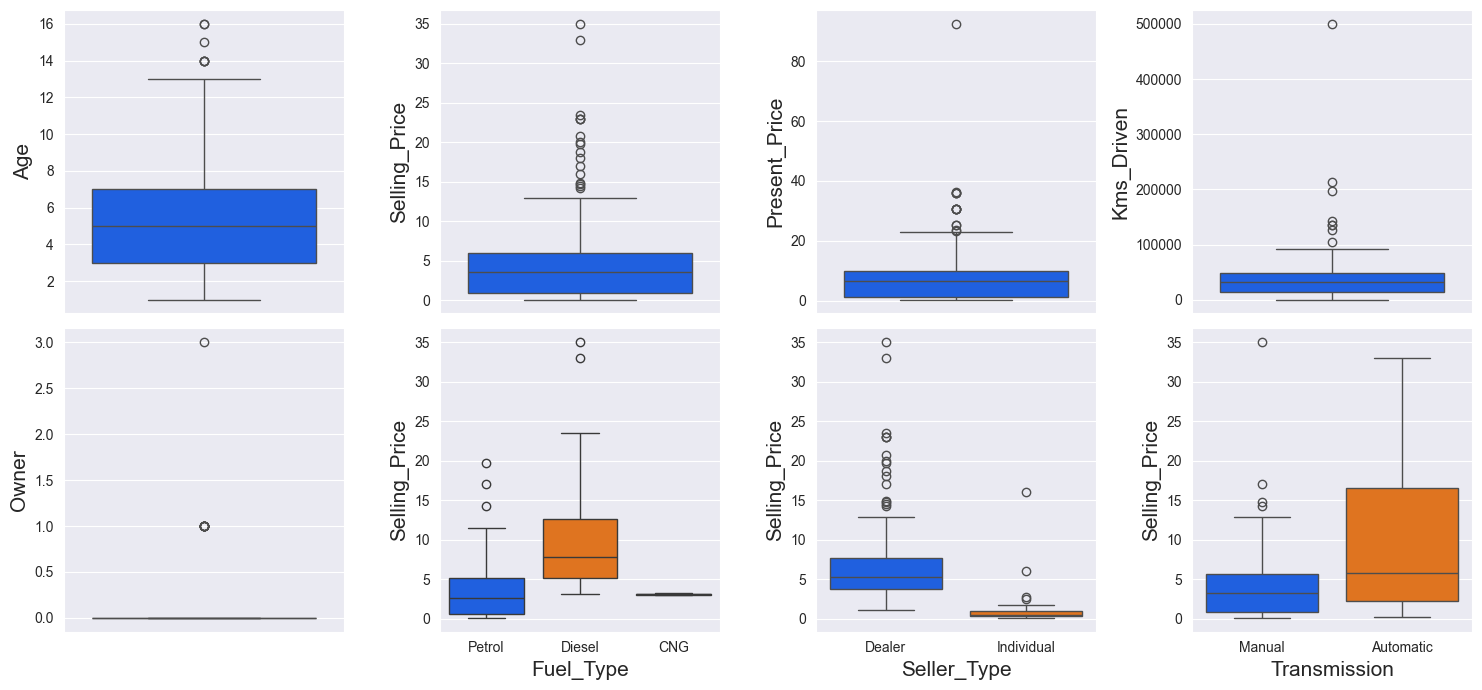

In [76]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values, 
                                df.select_dtypes(include='object').columns.values])

fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4
    if i<5:
        sns.boxplot(data=df, y=col, ax=ax[x,y],palette=colors)
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, x=col, y='Selling_Price', ax=ax[x,y],palette=colors)
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()   
plt.show()

In [77]:
outliers_indexes = []
target = 'Selling_Price'

for col in df.select_dtypes(include='object').columns:
    for cat in df[col].unique():
        df1 = df[df[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())
        
        
for col in df.select_dtypes(exclude='object').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = df[(df[col] < minimum) | (df[col] > maximum)]
    print(f'name col {col}  min = {minimum} max = {maximum}')
    outliers_indexes.extend(outlier_samples.index.tolist())
    
outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

name col Age  min = -3.0 max = 13.0
name col Selling_Price  min = -6.749999999999999 max = 13.649999999999999
name col Present_Price  min = -11.850000000000001 max = 22.950000000000003
name col Kms_Driven  min = -35650.5 max = 99417.5
name col Owner  min = 0.0 max = 0.0
38 outliers were identified, whose indices are:

[27, 37, 39, 50, 51, 52, 53, 54, 179, 184, 58, 59, 189, 62, 63, 64, 191, 66, 192, 196, 69, 193, 198, 201, 77, 205, 79, 80, 82, 84, 85, 86, 92, 93, 96, 97, 106, 241]


###### It is not acceptable to drop an observation just because it is an outlier. They can be legitimate observations and it’s important to investigate the nature of the outlier before deciding whether to drop it or not. We are allowed to delete outliers in two cases: Outlier is due to incorrectly entered or measured data Outlier creates a significant association

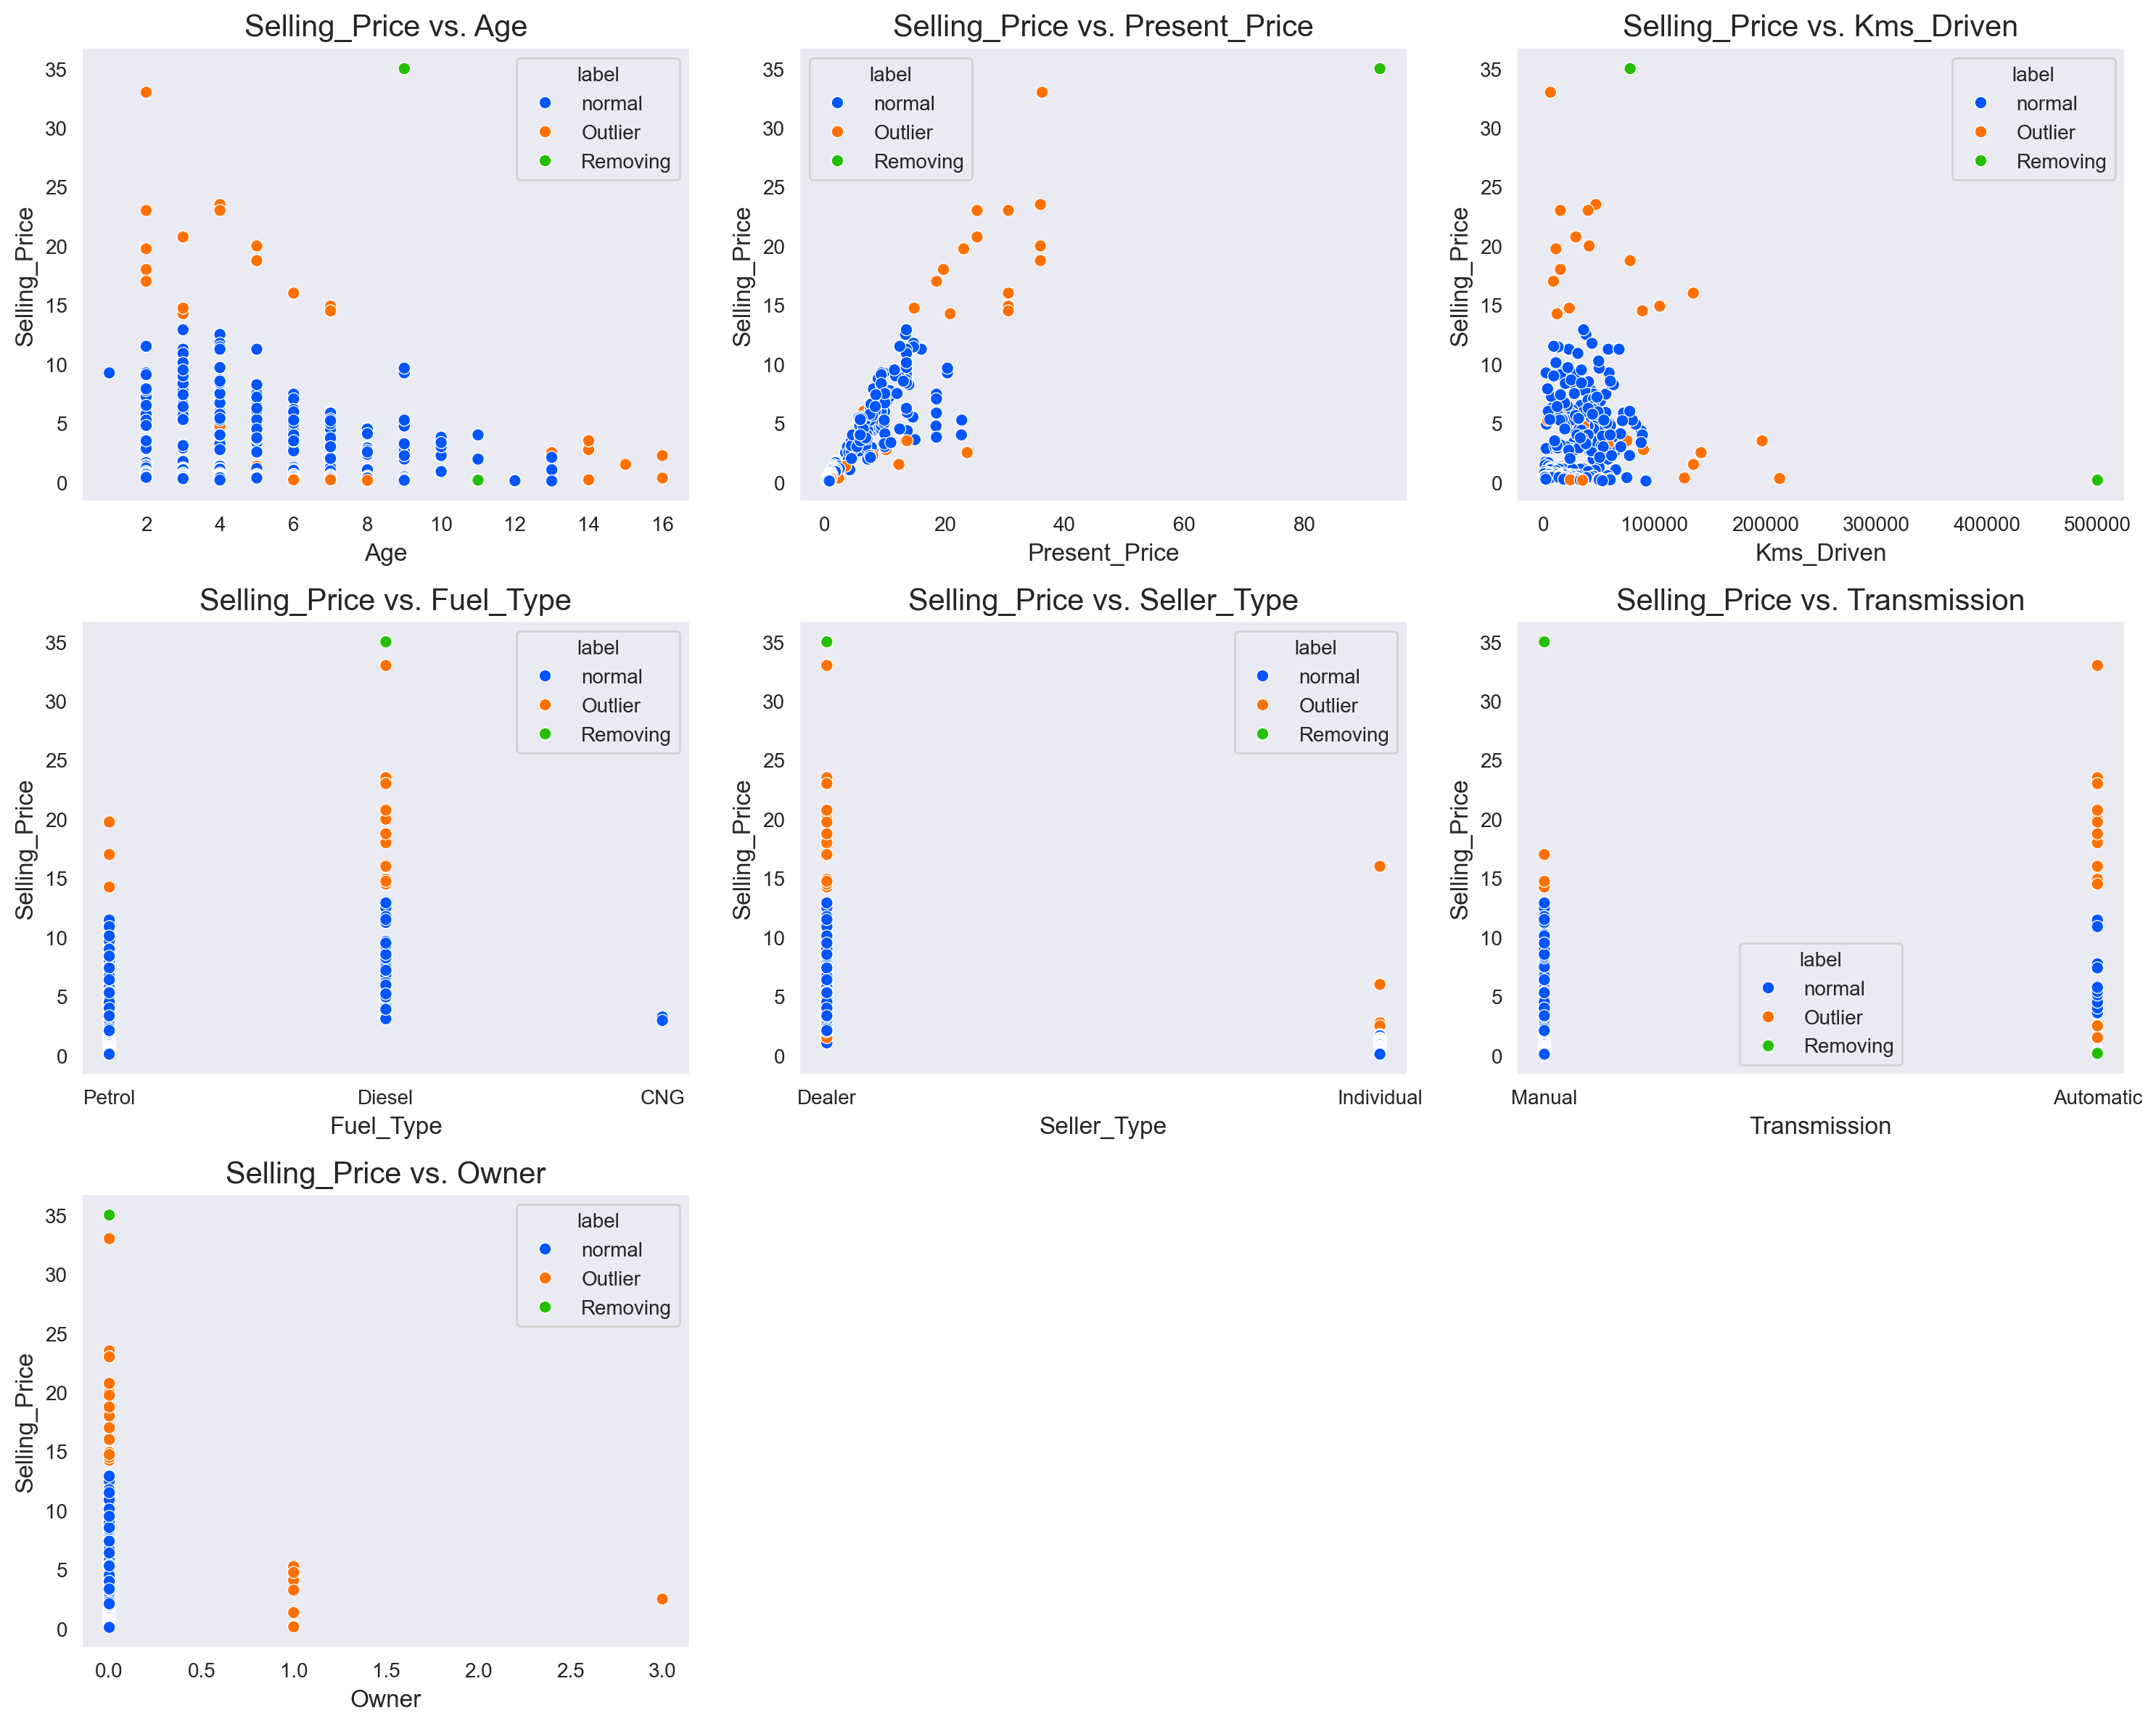

In [78]:
#Outliers Labeling
df1 = df.copy()
df1['label'] = 'normal'
df1.loc[outliers_indexes,'label'] = 'Outlier'

#Removing Outliers
removing_indexes = []
removing_indexes.extend(df1[ df1[target] > 33  ].index)
removing_indexes.extend(df1[df1['Kms_Driven'] > 400000].index)
df1.loc[removing_indexes,'label'] = 'Removing'

#Plot
target = 'Selling_Price'
features = df.columns.drop(target)
colors = ['#0055ff','#ff7000','#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig , ax = plt.subplots(nrows=3,ncols=3,figsize=(15,12),dpi=200)
for i in range(len(features)):
    x = i//3
    y = i%3
    sns.scatterplot(data=df1,x=features[i],y=target,hue='label',ax=ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target,features[i]),size=15)
    ax[x,y].set_xlabel(features[i],size=12)
    ax[x,y].set_ylabel(target,size=12)
    ax[x,y].grid()
    
ax[2,1].axis('off')
ax[2,2].axis('off')
plt.tight_layout()
plt.savefig('outliers.png')
plt.show()

In [79]:
# the perfect outliers:
removing_indexes = list(set(removing_indexes))
removing_indexes

[196, 86]

In [80]:
#Before Delete ,we will check if there any null data in our dataset
df.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [81]:
df1 = df.copy()
df1.drop(removing_indexes,inplace=True)
df1.reset_index(drop=True,inplace=True)
df1.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [82]:
df[df.duplicated(keep=False)]
#Since it is possible to have cars with the same features, we do not drop duplicates.

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,3,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,3,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0


## EDA

In [83]:
NumCols = ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

C:\Users\Pc\AppData\Local\Temp\ipykernel_22212\860613337.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x=CatCols[i],data=df1,ax=ax[i],palette=colors)
C:\Users\Pc\AppData\Local\Temp\ipykernel_22212\860613337.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12)
C:\Users\Pc\AppData\Local\Temp\ipykernel_22212\860613337.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12)
C:\Users\Pc\AppData\Local\Temp\ipykernel_22212\860613337.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

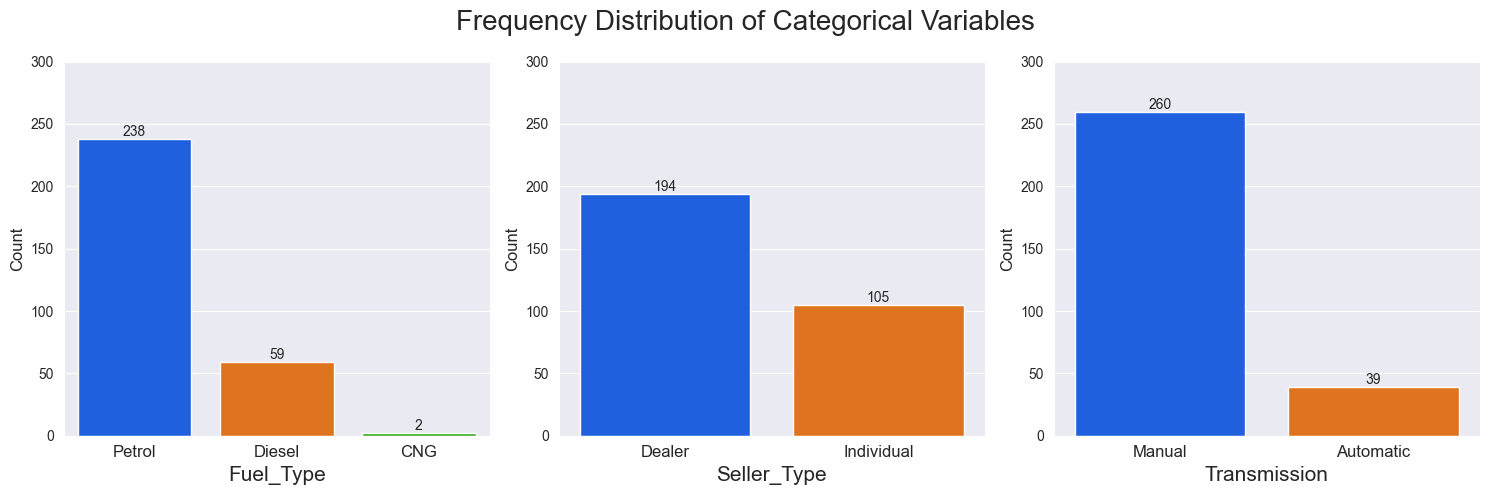

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=100)
colors = ['#0055ff', '#ff7000', '#23bf00']
for i in range(len(CatCols)):
    graph = sns.countplot(x=CatCols[i],data=df1,ax=ax[i],palette=colors)
    ax[i].set_xlabel(CatCols[i],fontsize=15)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_ylim([0,300])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12)
    for cou in graph.containers:
        graph.bar_label(cou)
    
plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20) 
plt.tight_layout()
plt.savefig("Univariate.png")
plt.show()


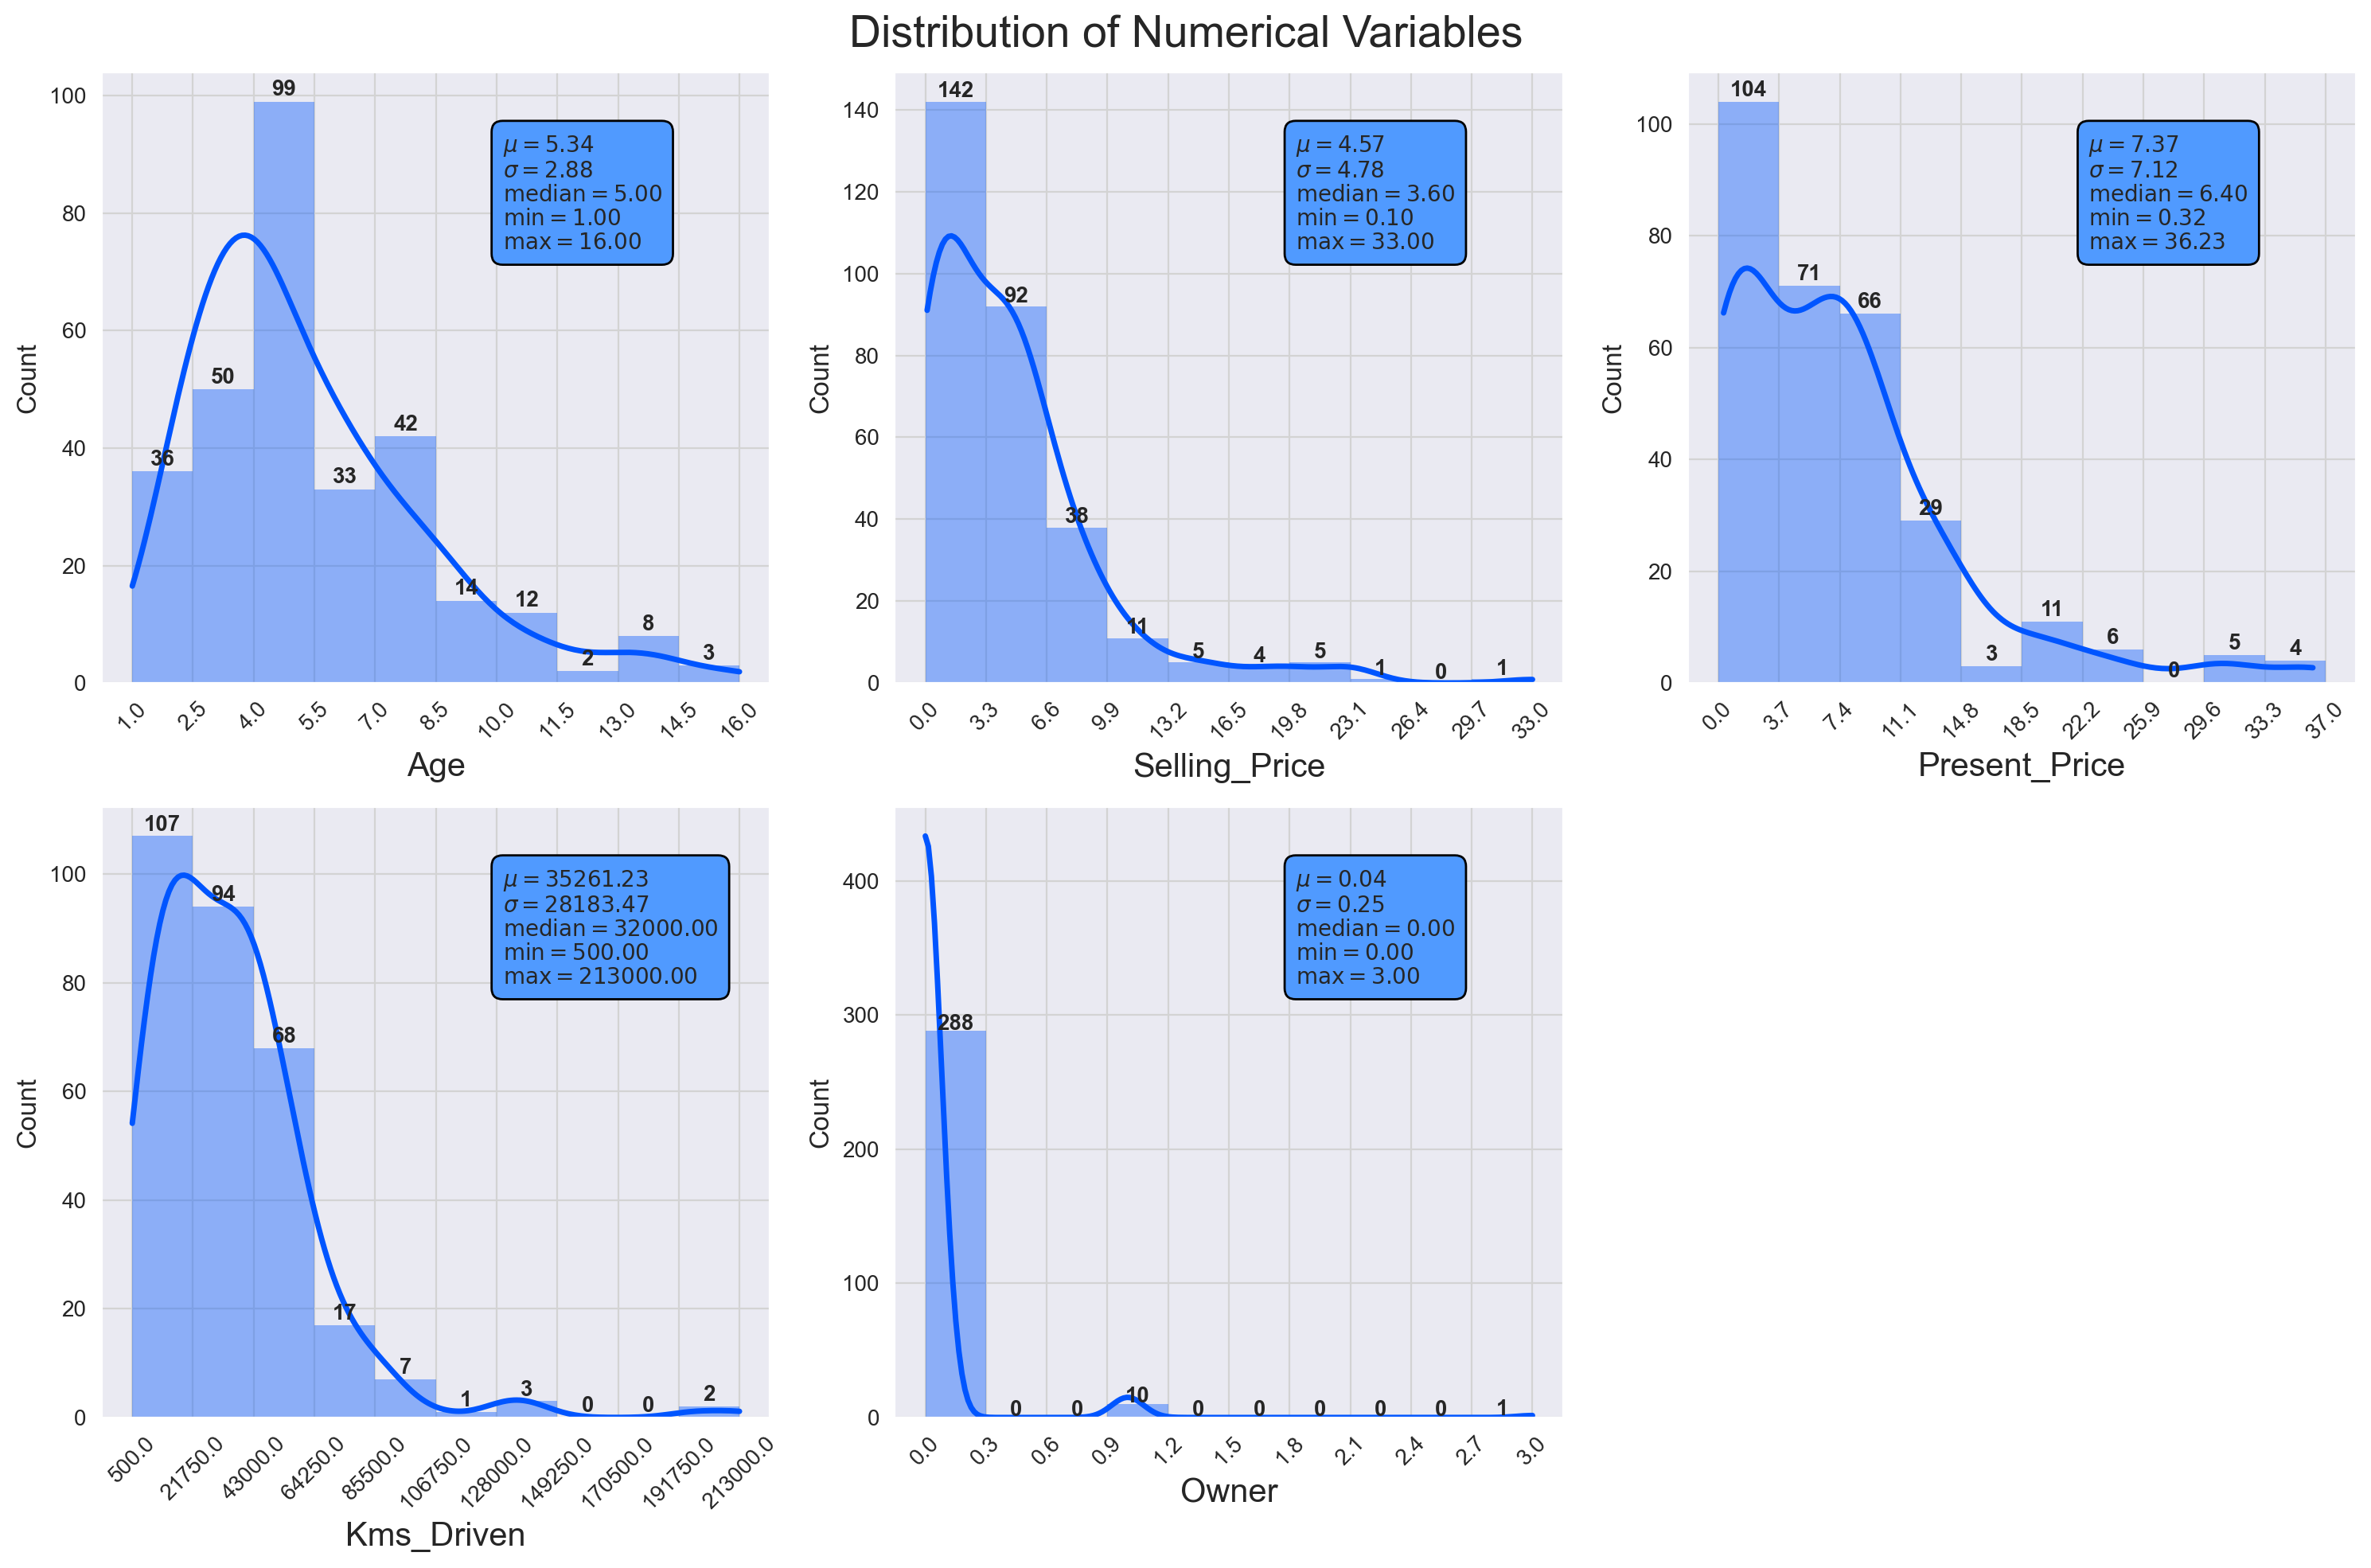

In [85]:
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(15,10),dpi=200)
c = '#0055ff'
for i in range(len(NumCols)):
    row = i//3
    col = i%3
    values, bin_edges = np.histogram(df1[NumCols[i]],   
                                    range=(np.floor(df1[NumCols[i]].min()), np.ceil(df1[NumCols[i]].max())))
    graph = sns.histplot(data=df1, x=NumCols[i], bins=bin_edges, kde=True, ax=ax[row,col],
                            edgecolor='none', color=c, alpha=0.4, line_kws={'lw': 2.5})
    ax[row,col].set_xlabel(NumCols[i], fontsize=15)
    ax[row,col].set_ylabel('Count', fontsize=12)
    ax[row,col].set_xticks(np.round(bin_edges,1))
    ax[row,col].set_xticklabels(ax[row,col].get_xticks(), rotation = 45)
    ax[row,col].grid(color='lightgrey')
    for j,p in enumerate(graph.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                                ha='center', fontsize=10 ,fontweight="bold")
    textstr = '\n'.join((
    r'$\mu=%.2f$' %df1[NumCols[i]].mean(),
    r'$\sigma=%.2f$' %df1[NumCols[i]].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df1[NumCols[i]]),
    r'$\mathrm{min}=%.2f$' %df1[NumCols[i]].min(),
    r'$\mathrm{max}=%.2f$' %df1[NumCols[i]].max()
    ))
    ax[row,col].text(0.6, 0.9, textstr, transform=ax[row,col].transAxes, fontsize=10, verticalalignment='top',
                        bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))
ax[1, 2].axis('off')
plt.suptitle('Distribution of Numerical Variables', fontsize=20) 
plt.tight_layout()   
plt.show()

#### Target vs. Numerical Features Bivariate Analysis

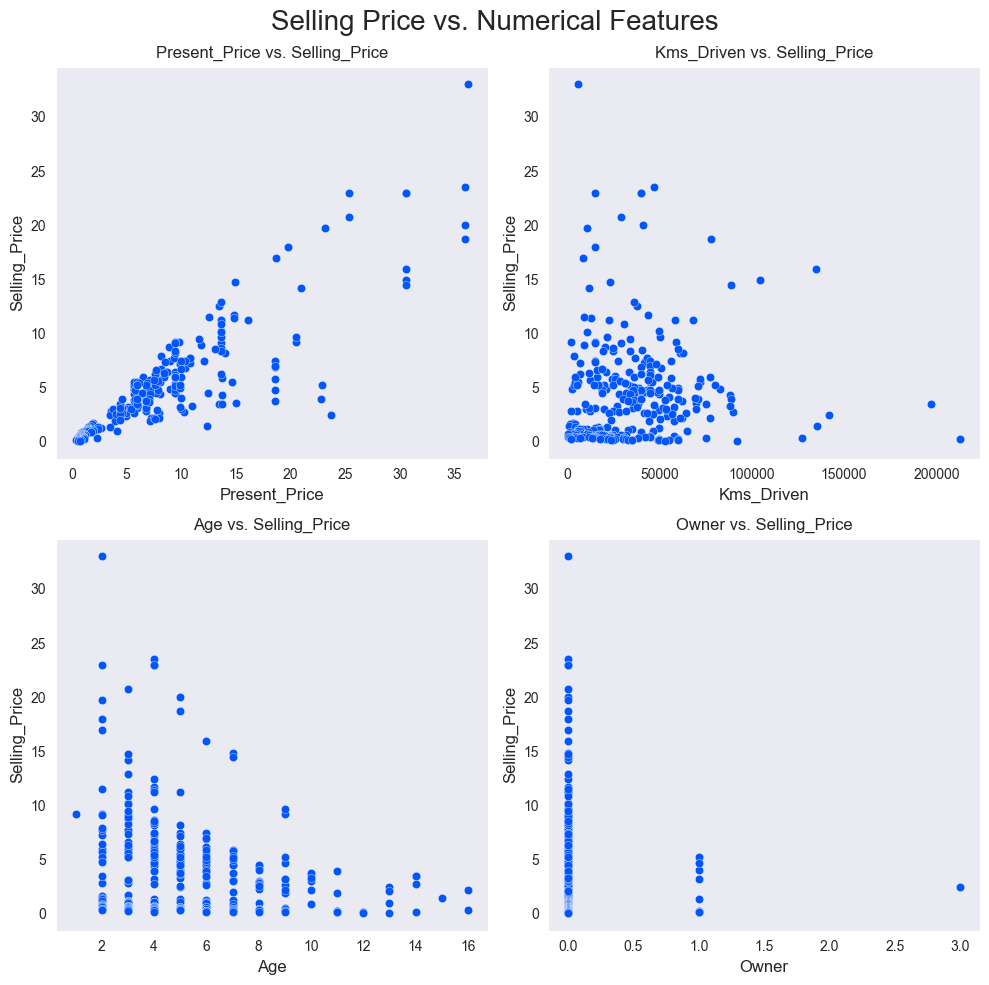

In [86]:
fig,ax = plt.subplots(nrows=2 , ncols=2 , figsize=(10,10),dpi=100)
num_features = ['Present_Price', 'Kms_Driven', 'Age', 'Owner']
c = '#0055ff'
for i in range(len(num_features)):
    row = i//2
    col = i%2
    ax[row,col].scatter(df1[num_features[i]],df1[target],color=c,edgecolors='w',linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(num_features[i],target),size=12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('Selling Price vs. Numerical Features', size = 20)
plt.tight_layout()
plt.savefig("a.png")
plt.show()



#### Target vs. Categorical Features Bivariate Analysis

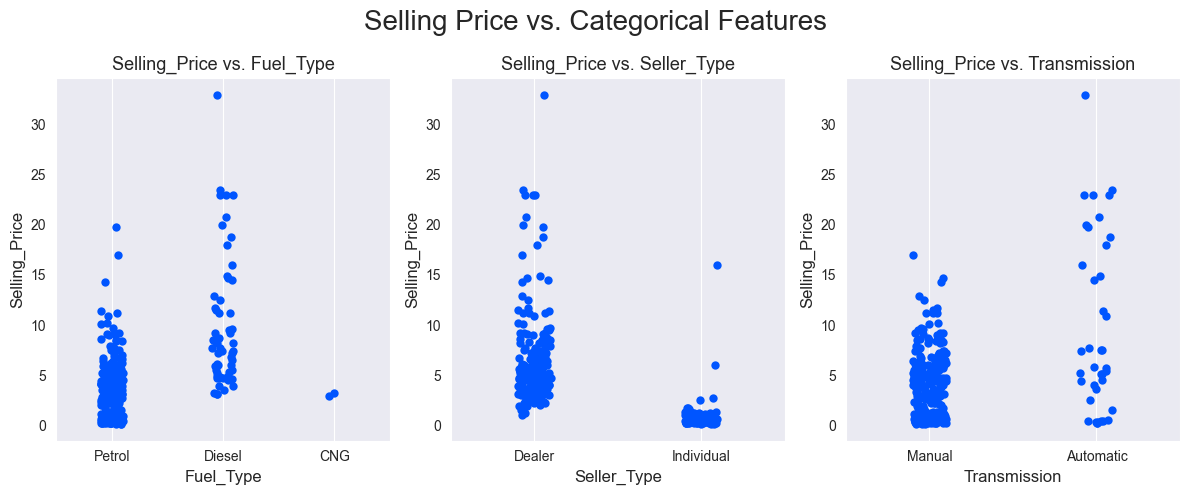

In [87]:
fig, axes = plt.subplots(nrows=1 ,ncols=3, figsize=(12,5), dpi=100)
cat_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
c = '#0055ff'

for i in range(len(cat_features)):
    sns.stripplot(ax=axes[i], x=cat_features[i], y=target, data=df1, size=6, color=c)
    axes[i].set_title('{} vs. {}'.format(target, cat_features[i]), size = 13)
    axes[i].set_xlabel(cat_features[i], size = 12)
    axes[i].set_ylabel(target, size = 12)
    axes[i].grid()


plt.suptitle('Selling Price vs. Categorical Features', size = 20)
plt.tight_layout()
plt.show()


#### Categorical Variables Encoding
##### We implement dummy encoding on categorical columns, since they are all nominal variables:

In [88]:
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

df1 = pd.get_dummies(df1,columns=CatCols,drop_first=True)
df1[df1.select_dtypes('bool').columns] = df1.select_dtypes('bool').astype(int)
df1.head(5)

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,0,1,0,1
1,6,4.75,9.54,43000,0,1,0,0,1
2,2,7.25,9.85,6900,0,0,1,0,1
3,8,2.85,4.15,5200,0,0,1,0,1
4,5,4.60,6.87,42450,0,1,0,0,1


#### Correlation Analysis

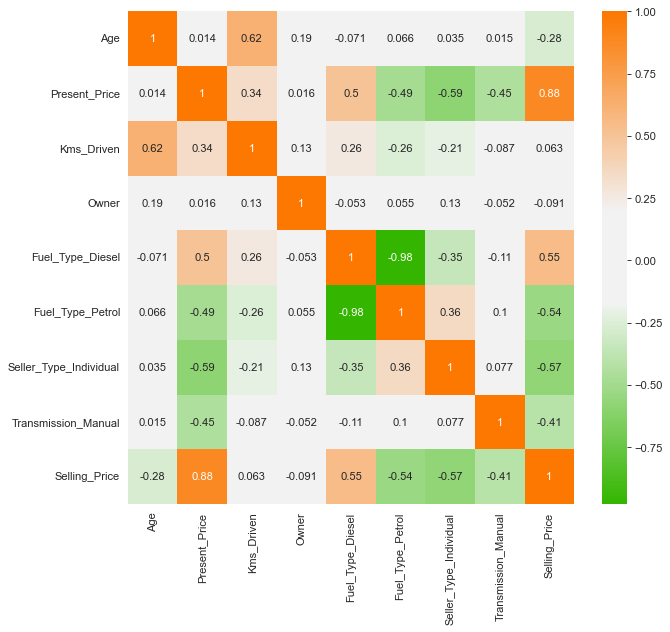

In [89]:
target = 'Selling_Price'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([df1.drop(target,axis=1), df1[target]],axis=1).corr(), annot=True, cmap=cmap)
plt.show()

#### Build Linear Regression Model
##### Determine Features & Target Variables

In [90]:
X = df1.drop('Selling_Price',axis=1)
y = df1['Selling_Price']

##### Split Dataset to Training & Test Sets

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [92]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (209, 8)
X_test shape:  (90, 8)
y_train shape:  (209,)
y_test shape:  (90,)


In [105]:
y_test_actual = y_test

In [93]:
Scaler = StandardScaler()
Scaler.fit(X_train)
X_train_scaler = Scaler.transform(X_train)
X_test_scaler = Scaler.transform(X_test)

#### Train the model

In [125]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaler,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Let's find the intercept and co-efficient for each column in our training dataset.

In [126]:
pd.DataFrame(data=np.append(linear_reg.intercept_,linear_reg.coef_),index=['Intercept']+[col+" Coef." for col in X.columns]
                ,columns=['Value']).sort_values('Value',ascending=False)

,Value
Intercept,4.302488
Present_Price Coef.,3.492729
Fuel_Type_Diesel Coef.,0.850217
Fuel_Type_Petrol Coef.,0.207319
Transmission_Manual Coef.,0.027375
Owner Coef.,-0.232722
Seller_Type_Individual Coef.,-0.377334
Kms_Driven Coef.,-0.589672
Age Coef.,-0.936339


#### Model Evaluation

In [127]:
def model_evaluation(model,X_test,y_test,model_name):
    y_pred = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test,y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], 
                        index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])
    
model_evaluation(linear_reg, X_test_scaler, y_test, 'Linear Reg.')

,Linear Reg.
MAE,1.198867
MSE,3.714913
RMSE,1.927411
R2-Score,0.887245


#### Model Evaluation using Cross-Validation

In [129]:
linear_reg_cv = LinearRegression()
scaler = StandardScaler()
pipline = make_pipeline(StandardScaler(),LinearRegression())

kf = KFold(n_splits=6,shuffle=True,random_state=0)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result = cross_validate(pipline,X,y,cv=kf,return_train_score=True,scoring=scoring)

MAE_mean = (-result['test_neg_mean_absolute_error']).mean()
MAE_std = (-result['test_neg_mean_absolute_error']).std()
MSE_mean = (-result['test_neg_mean_squared_error']).mean()
MSE_std = (-result['test_neg_mean_squared_error']).std()
RMSE_mean = (-result['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result['test_r2'].mean()
R2_Score_std = result['test_r2'].std()

pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std]},
                index=['MAE', 'MSE', 'RMSE' ,'R2-Score'])


,Mean,Std
MAE,1.154774,0.147377
MSE,3.131755,1.314319
RMSE,1.728702,0.378609
R2-Score,0.855703,0.033720


#### Results Visualization

In [138]:

y_test_pred = linear_reg.predict(X_test_scaler)
df_comp = pd.DataFrame({'Actual':y_test_actual,'Predicted':y_test_pred})

##### Let's compare the actual and predicted target values for the test data with the help of a bar plot.

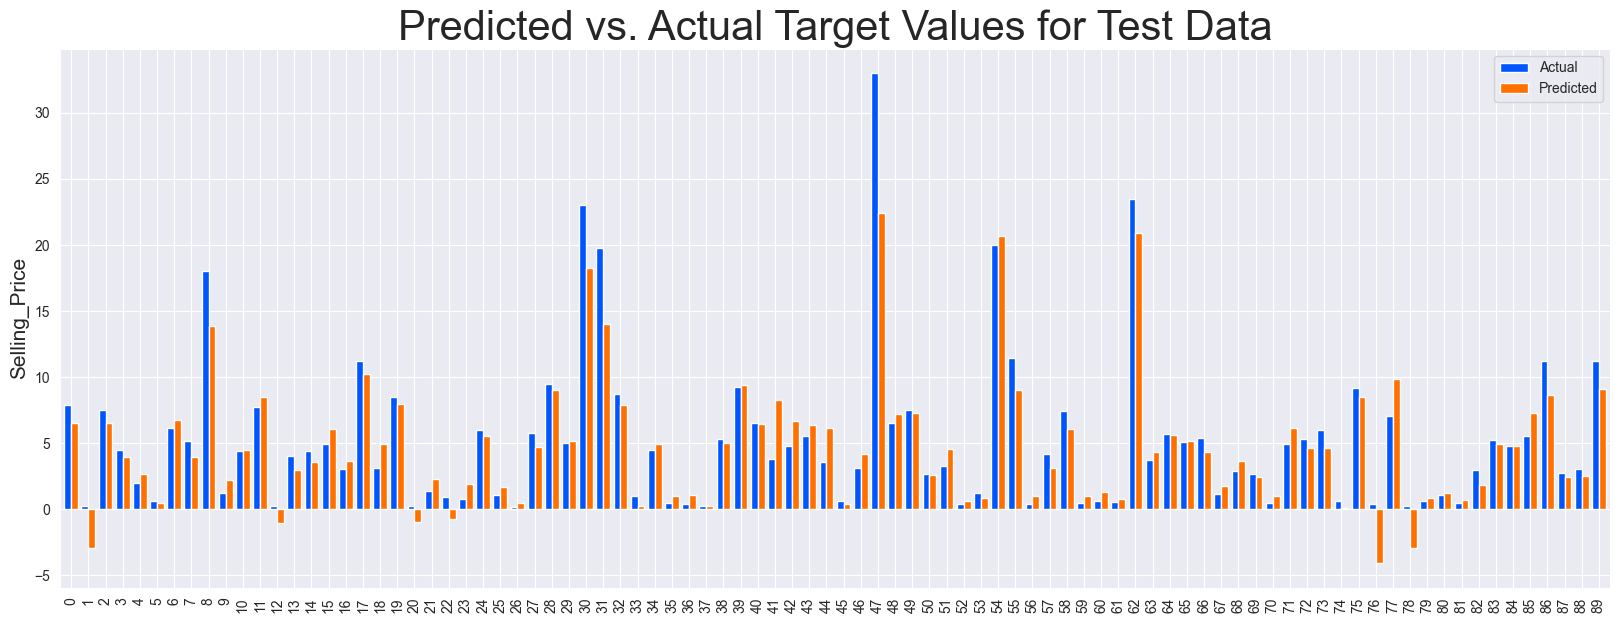

In [139]:
def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'],kind='bar',figsize=(20,7),width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=30)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()
    
compare_plot(df_comp)